
# 데이터 탐색

### 데이터의 요약이나 통계 정보를 출력

### 탐색적 시각화를 이용

In [2]:
# 기본 작업

import numpy as np
import pandas as pd

# matplotlib 기반의 그래프를 출력할 때 한글을 사용하기 위한 설정
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [3]:
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)


#### 히스토그램
##### 빈도 분석을 위해 그리는 차트
##### 변수가 하나인 단변수 데이터의 빈도 수를 표현

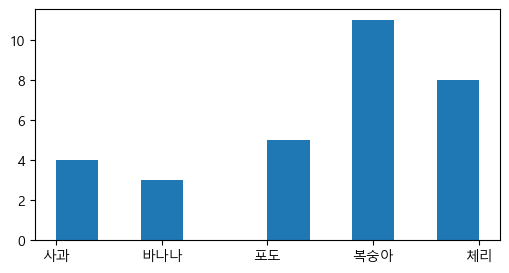

In [21]:
# lovefruits.csv 파일 읽기
# 첫 행이 컬럼의 이름
# 구분자는 ,(컴마)
# 한글이 데이터에 포함 - 읽어지지 않으면 인코딩 필요

DF = pd.read_csv('./data/lovefruits.csv', encoding = 'cp949')
#print(DF)
# 정보 확인 - 데이터 31개, null 없음, 컬럼 2개
#DF.info()

# 데이터의 빈도수 확인
# sort 옵션을 설정하지 않으면 count 순서대로 내림차순 정렬을 수행
data = DF['선호과일'].value_counts(sort = False)
#print(data)

plt.figure(figsize = (6,3))
# 히스토그램을 그릴 때는 데이터만 주면 됨
# 선호과일(문자열 데이터) 의 count를 가지고 히스토그램을 생성
plt.hist(DF['선호과일'])
plt.show()


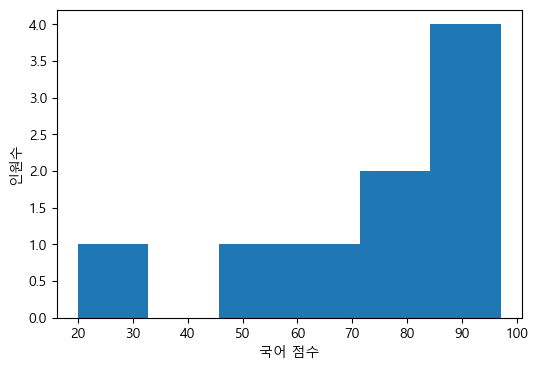

In [24]:
# 데이터 읽어오기
DF = pd.read_csv('./data/student.csv', encoding = 'cp949')
#print(DF)
#DF.info()

plt.figure(figsize = (6,4))
plt.xlabel('국어 점수')
plt.ylabel('인원수')

# 히스토그램 그리기
# 문자열과 다르게 점수처럼 여러 값이 존재하는 데이터의 경우에는
# 되도록이면 구간 별로 히스토그램을 그리는 것이 일반적으로 좋음
plt.hist(DF['국어'], bins = 6) # bins 를 사용해서 6개 구간으로 분리
plt.show()

### scatter 그래프(산포도)

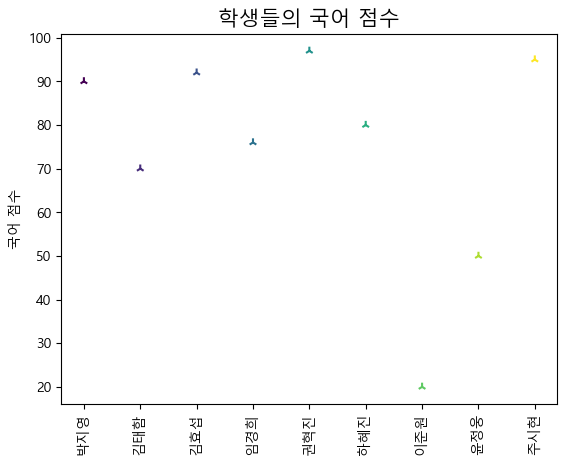

In [36]:
DF = pd.read_csv('./data/student.csv', encoding = 'cp949')

# scatter 그리기
plt.figure()
plt.title('학생들의 국어 점수', fontsize = 15)
plt.ylabel('국어 점수')
#plt.xlabel('학생 번호')
# x 축을 학생 수로 나누고 각자의 이름을 출력
plt.xticks(range(0, len(DF['국어']), 1), DF['이름'], rotation = 'vertical')
# 학생번호(index)를 가지고 색상을 부여
colormap = DF.index 
# marker 옵션을 통해 마커 모양을 바꿀 수 있음
# c 는 색상을 정하는 옵션
plt.scatter(x = DF.index, y = DF['국어'], marker = '2', c = colormap)

plt.show()

In [45]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

In [42]:
# 여러 개의 컬럼을 이용한 산포도

DF = pd.read_csv('./data/noheader_auto-mpg.csv', header = None)
DF.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
#print(DF.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [47]:
# 존재하지 않던 컬럼이므로 컬럼이 추가됨
DF['cylinder size'] = DF['cylinders'] / DF.cylinders.max() * 300
#print(DF.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  cylinder size  
0       1  chevrolet chevelle malibu          300.0  
1       1          buick skylark 320          300.0  
2       1         plymouth satellite          300.0  
3       1              amc rebel sst          300.0  
4       1                ford torino          300.0  


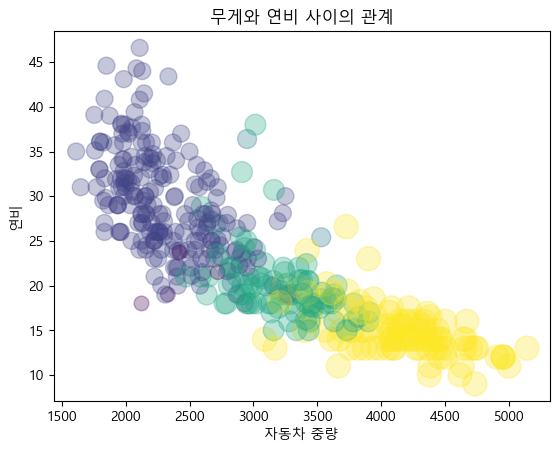

<Figure size 600x400 with 0 Axes>

In [55]:
# 무게와 연비 데이터를 가지고 scatter 그래프를 그림
# s 옵션을 통해 사이즈(크기)를 적용
# c 옵션을 통해 색상을 지정
# alpha 옵션을 통해 투명도를 지정
colormap = DF['cylinder size'] # 실린더 갯수 별로 색상을 다르게 지정
plt.scatter(x = DF['weight'], y = DF['mpg'], s = DF['cylinder size'], c = colormap, alpha = 0.3)
plt.title('무게와 연비 사이의 관계')
plt.xlabel('자동차 중량')
plt.ylabel('연비')
plt.figure(figsize = (6, 4))

plt.show()

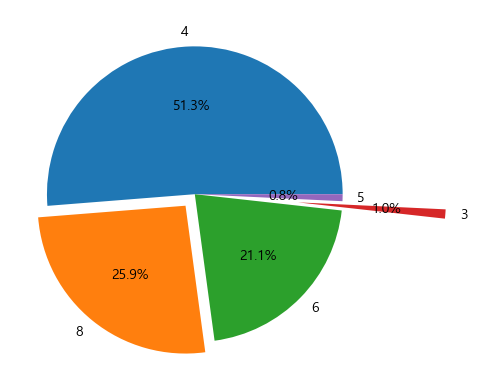

In [69]:
# pie 차트 그리기

# DF 데이터에서 cylinders 항목의 종류를 세서 차트로 표현
data = DF['cylinders'].value_counts()
# explode 옵션 - 중점으로부터 떨어지는 비율
explode = (0, 0.1, 0, 0.7, 0) # 차지하는 백분율 순서대로 정렬되어 있음
# labels 옵션을 통해 cylinders 종류를 표현
# autopct 옵션을 사용해서 백분율을 차트에 표현
plt.pie(data, labels = data.index, autopct = '%1.1f%%', explode = explode)
plt.show()

In [70]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|    

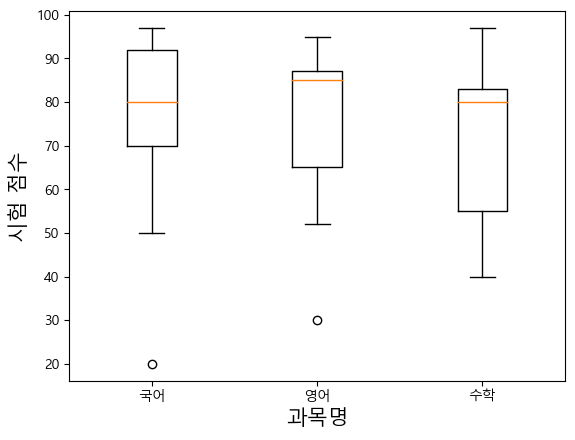

In [81]:
# BoxPlot 그리기
# 이상치 데이터 확인이 편함

DF = pd.read_csv('./data/student.csv', encoding = 'cp949')
# sequence 데이터를 사용할 수 있으므로 아래처럼 여러 데이터를 줄 수 있음
plt.boxplot((DF['국어'], DF['영어'], DF['수학']), labels = ('국어', '영어', '수학'))
plt.ylabel('시험 점수', fontsize = 15)
plt.xlabel('과목명', fontsize = 15)

plt.show()

## Seaborn 패키지

In [43]:
import seaborn as sns

# 기본 제공 데이터셋
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


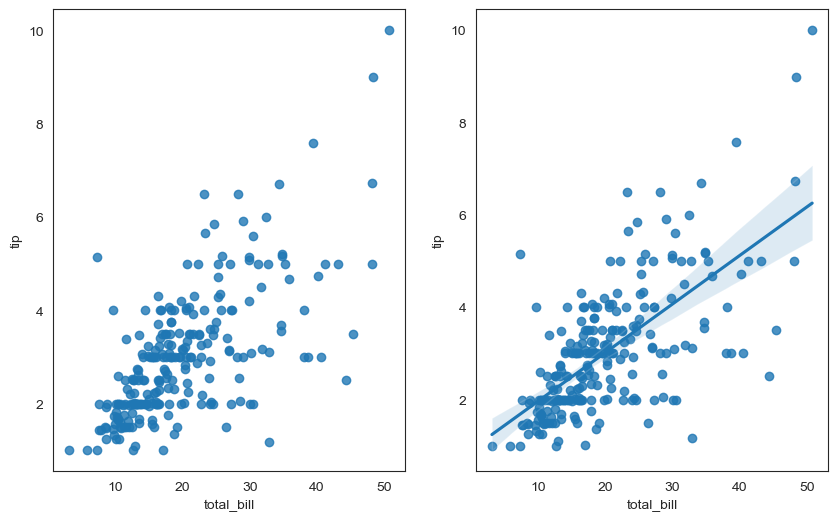

In [95]:
# 2개의 그래프를 그려서 비교
# 보통 2개 이상의 그래프를 그릴 때 figsize 를 설정함
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 배경색을 설정 - white
sns.set_style('white')

# tips 데이터 중 컬럼 이름을 사용해서 데이터를 가져옴
# fit_reg 옵션을 True 로 설정하면 회귀선을 그림
sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, ax = ax1)
sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = True, ax = ax2)

plt.show()

## Folium

In [96]:
!pip install folium

     ---------------------------------------- 102.3/102.3 kB ? eta 0:00:00


In [1]:
import folium

# location 으로 중앙점 좌표 전달
# zoom_start 는 시작할 때의 확대 정도(배율)
m = folium.Map(location = [37.572656, 126.973304], zoom_start = 15)

# 지도에 마커 표시
folium.Marker(location = [37.572656, 126.973304], popup = 'KB 카드', icon = folium.Icon(icon = 'cloud')).add_to(m)
folium.Marker(location = [37.569027, 126.987279], popup = 'Mega IT', icon = folium.Icon(icon = 'cloud')).add_to(m)
# 다각형 마커 표시 - 변의 갯수, 크기(radius, 반경) 를 지정
folium.RegularPolygonMarker([37.572656, 126.973304], popup = '다각형', number_of_sides = 5, radius = 30).add_to(m)

# chrome 이 아닌 환경에서 출력하려면 별도의 save가 필요
# map 이라는 html 파일로 저장(변환) - 저장 위치는 해당 ipynb 파일의 디렉토리
#m.save('map.html')

# folium 을 사용한 m 만 입력하면 결과 출력
m


In [119]:
# 대학교 위치 데이터 가져오기
# 데이터가 깨지지 않으므로 인코딩이 필요하지 않음
DF = pd.read_excel('./data/서울지역_대학교_위치.xlsx')
#print(DF.head())

m = folium.Map(location = [37.55, 126.98], zoom_start = 12)

# DataFrame 데이터 순회 - zip 을 사용해서 데이터를 묶음
# fill_opacity 는 불투명도
for name, lat, lng in zip(DF['Unnamed: 0'], DF['위도'], DF['경도']):
    folium.CircleMarker([lat, lng], radius = 10, color = 'blue', fill = True,
                       fillcolor = 'colar', fill_opacity = 0.3, popup = name).add_to(m)

m


In [15]:
# 경기도 인구 단계 구분도 그리기

# json 파싱을 위한 패키지 
import json

# 경기도 인구 데이터 가쟈오기
DF = pd.read_excel('./data/경기도인구데이터.xlsx')
#print(DF.head())

# 컬럼의 이름이 숫자 형태이기 때문에 사용하기 어려울 수 있으므로 문자열로 변환
DF.columns = DF.columns.map(str)

# 행정 구역 경계와 관련된 json 파일을 열어서 파싱
try:
    geo_data = json.load(open('./data/경기도행정구역경계.json', encoding = 'utf-8'))
except:
    # utf-8 로 인코딩이 되지 않고 깨지는 경우
    geo_data = json.load(open('./data/경기도행정구역경계.json', encoding = 'utf-8-sig'))
#print(geo_data)

# index 변경
DF.index = DF['구분']

# 지도 생성
# tiles 옵션을 이용해서 지도의 타입을 변경
geo_map = folium.Map(location = [37.5502, 126.982], zoom_start = 9,
                    tiles = 'Stamen Terrain')

# 단계 구분도 생성
# fill_color 옵션을 통해 채울 색상을 설정
# threshold_scale 옵션을 통해 색을 칠할 범위를 구분
folium.Choropleth(geo_data = geo_data, data = DF['2008'], columns = [DF.index, DF['2008']],
                 fill_color = 'YlOrRd', fill_opacity = 0.7, threshold_scale = [10000, 100000, 300000, 500000, 700000],
                 key_on = 'feature.properties.name', line_opacity = 0.5).add_to(geo_map)


# 지도 출력
geo_map

<Axes: xlabel='date'>

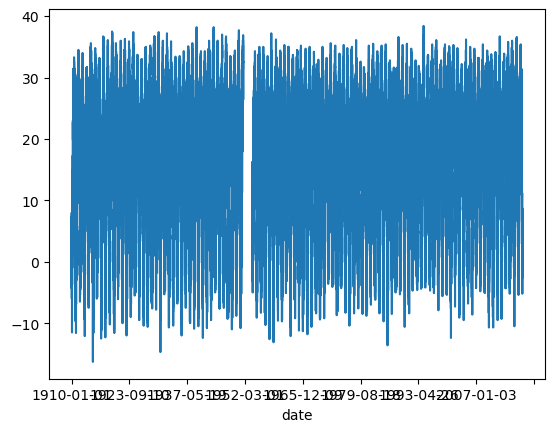

In [25]:
# 서울의 기온 데이터 가져오기
DF = pd.read_csv('./data/seoul.csv')
#print(DF.head())
#DF.info()

# pandas 의 plot 함수를 가지고 그래프 그리기
#DF.plot() # 기본적인 그리기
DF.index = DF['date']
DF['max'].plot() # 특정 컬럼에 대해서만 그래프 그리기

In [28]:
#DF['max'].plot(kind = 'bar')

In [36]:
from pandas import DataFrame

# 데이터가 중복된 데이터 프레임 생성
DF = DataFrame([['안녕하세요', 'hi', 'hi'], ['한국', '미국', '미국']])
DF = DF.transpose() # 행과 열 전치
#print(DF)

# 데이터의 중복 확인하기
#print(DF.duplicated()) # 중복이 되는 2번(3번째) 인덱스만 True이고 나머진 False

# 데이터의 중복 제거
DF.drop_duplicates(inplace = True) # 중복 제거를 원본에 반영
print(DF) # 0, 1 번 인덱스의 데이터만 출력됨(2번의 중복이 삭제)

       0   1
0  안녕하세요  한국
1     hi  미국


In [42]:
def func(data):
    return (data * 2)

# Series 에 함수 적용
#print(DF[0].apply(func)) # Series 는 셀 단위로 함수가 적용됨
print(DF.apply(func)) # DataFrame 은 행이나 열 단위로 함수가 적용되는데 기본은 열 단위 적용
# broadcast 연산이 발생하기 떄문에 셀 단위로 적용되는 것처럼 보임
# 셀 단위 적용을 하기 위해서는 apply 가 아니라 applymap 함수를 호출해야 함

# 셀 단위로 적용하는 applymap - 여기 예제에서는 결과가 동일함
print(DF.applymap(func)) 

# lambda 함수로 적용
# lambda 매개변수이름 나열 : 리턴할 식
print(DF[0].apply(lambda data : data * 2))

            0     1
0  안녕하세요안녕하세요  한국한국
1        hihi  미국미국
            0     1
0  안녕하세요안녕하세요  한국한국
1        hihi  미국미국
0    안녕하세요안녕하세요
1          hihi
Name: 0, dtype: object


In [49]:
# seaborn 에서 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
#print(titanic.head())

# 데이터에서 age, fare 만 가져오기
DF = titanic[['age', 'fare']]
#print(DF.head())

# max, min 집계 함수를 사용해서 각각이 아니라 열 단위로 함수가 적용됨
result = DF.apply(lambda data : data.max() - data.min(), axis = 0)
print(result)

age      79.5800
fare    512.3292
dtype: float64


In [54]:
DF = titanic[['age', 'fare']]
#print(type(DF)) # 데이터 타입은 DataFrame

# 하나의 데이터를 가지고 null 여부를 판단하는 함수를 대입
# 셀 단이로 적용해서 DataFrame 을 리턴
print(DF.pipe(lambda data : data.isnull()))

# 집계를 하는 함수를 대입하면 열 단위로 대입해서 집계를 수행한 후 Series 를 리턴
# null 을 갖는 데이터의 수를 집계
print(DF.pipe(lambda data : data.isnull()).sum())

# Series 를 리턴하는 함수를 대입하면 하나의 값을 리턴
print(DF.pipe(lambda data : data.isnull()).sum().sum())


       age   fare
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
886  False  False
887  False  False
888   True  False
889  False  False
890  False  False

[891 rows x 2 columns]
age     177
fare      0
dtype: int64
177


In [58]:
# 연/월/일 분리하기
DF = pd.read_excel('./data/주가데이터.xlsx')
#print(DF.head()) # 연월일 을 - 를 사용해서 구분
#DF.info() # 연월일 컬럼은 자료형이 string이 아니라 
        # datetime 이라서 split 을 사용할 수 없음

# 데이터 타입 변경
# astype 을 호출해서 변경하거나
# map 함수에 형을 변경할 수 있는 함수를 대입
DF['연월일'] = DF['연월일'].astype('str') # astype 을 호출
 # - 를 구분자로 사용해서 split
dates = DF['연월일'].str.split('-') # list 형태로 분리됨
#print(dates.head())

# 구분한 리스트에서 연, 월, 일 데이터를 가져와서 원본 데이터에 추가
DF['연'] = dates.str.get(0)
DF['월'] = dates.str.get(1)
DF['일'] = dates.str.get(2)
print(DF.head())


          연월일   당일종가  전일종가     시가     고가     저가     거래량     연   월   일
0  2018-07-02  10100   600  10850  10900  10000  137977  2018  07  02
1  2018-06-29  10700   300  10550  10900   9990  170253  2018  06  29
2  2018-06-28  10400   500  10900  10950  10150  155769  2018  06  28
3  2018-06-27  10900   100  10800  11050  10500  133548  2018  06  27
4  2018-06-26  10800   350  10900  11000  10700   63039  2018  06  26


In [66]:
# concat 을 사용한 데이터 결합
DF1 = pd.DataFrame({
    'a' : ['a0', 'a1', 'a2', 'a3'],
    'b' : ['b0', 'b1', 'b2', 'b3'],
}, index = [1, 2, 3, 4])

DF2 = pd.DataFrame({
    'a' : ['a1', 'a2', 'a3', 'a4'],
    'b' : ['b1', 'b2', 'b3', 'b4'],
    'c' : ['c1', 'c2', 'c3', 'c4'],
}, index = [2, 3, 4, 5])


print(pd.concat([DF1, DF2]))# 기본적으로 행 방향으로 결합
# 동일한 컬럼은 값이 있지만 한 쪽에만 존재하는 컬럼은 반대쪽에서는 NaN

# 열 방향으로 결합
# 동일한 인덱스끼리 결합
# 한 쪽에만 존재하는 데이터도 결합 - Outer Join 방식
print(pd.concat([DF1, DF2], axis = 1))

# 양쪽 모두에 존재하는 데이터만 결합 - Inner Join 방식
# join 옵션에 inner 를 부여
print(pd.concat([DF1, DF2], axis = 1, join = 'inner')) # 1, 5번 인덱스 없이 2, 3, 4 번만 

    a   b    c
1  a0  b0  NaN
2  a1  b1  NaN
3  a2  b2  NaN
4  a3  b3  NaN
2  a1  b1   c1
3  a2  b2   c2
4  a3  b3   c3
5  a4  b4   c4
     a    b    a    b    c
1   a0   b0  NaN  NaN  NaN
2   a1   b1   a1   b1   c1
3   a2   b2   a2   b2   c2
4   a3   b3   a3   b3   c3
5  NaN  NaN   a4   b4   c4
    a   b   a   b   c
2  a1  b1  a1  b1  c1
3  a2  b2  a2  b2  c2
4  a3  b3  a3  b3  c3


In [67]:
# append 를 사용한 데이터 결합
# 일반적인 concat 과 동일한 결과
print(DF1.append(DF2))

    a   b    c
1  a0  b0  NaN
2  a1  b1  NaN
3  a2  b2  NaN
4  a3  b3  NaN
2  a1  b1   c1
3  a2  b2   c2
4  a3  b3   c3
5  a4  b4   c4


C:\Users\USER\AppData\Local\Temp\ipykernel_5580\855814581.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(DF1.append(DF2))


In [72]:
# 데이터 생성
data_a = pd.Series([np.nan, 2.5, np.nan, 3, 4.4, 6, np.nan]) # np.nan 은 NaN 데이터
data_b = pd.Series(np.arange(len(data_a), dtype = np.float64)) # 데이터가 0.0 ~ 6.0
#print(data_a)
#print(data_b)

# 조건 생성
#r = np.where(조건, 데이터1, 데이터2)
# 조건이 True인 경우에는 데이터1, False인 경우에는 데이터2

# data_a 의 값이 NaN 인 경우 data_b 의 값으로 대체하기
# 데이터는 NaN 이지만 사용하는 함수는 isnull
r = np.where(pd.isnull(data_a), data_b, data_a)
# numpy의 1차원 배열은 출력할 때 행(가로) 방향으로 데이터를 출력함
print(r)

# combine_first 함수를 사용
# data_a 에 데이터가 없다면 data_b 의 데이터를 가져와서 사용
# numpy 의 배열이 아니라 pandas 데이터이기 때문에 열(세로) 방향
print(data_a.combine_first(data_b))
print(pd.Series(r)) # r 도 pandas 의 Series 로 바꾸면 열 방향으로 출력

[0.  2.5 2.  3.  4.4 6.  6. ]
0    0.0
1    2.5
2    2.0
3    3.0
4    4.4
5    6.0
6    6.0
dtype: float64
0    0.0
1    2.5
2    2.0
3    3.0
4    4.4
5    6.0
6    6.0
dtype: float64


In [74]:
# stock 데이터 가져오기
stock = pd.read_excel('./data/stock price.xlsx')
valuation = pd.read_excel('./data/stock valuation.xlsx')
# 양 쪽에 id 라는 컬럼이 존재
#print(stock.head())
#print(valuation.head())

# 동일한 id 를 갖는 데이터만 합치는 inner join 이기 때문에 4개만 가져옴
inner_join = pd.merge(stock, valuation)
print(inner_join)

# 중복되는 컬럼은 삭제
# 삭제하는 방법은 2가지 - del을 통해 삭제, 필요한 데이터만 골라서 복사하기(filter)

       id stock_name          value   price    name           eps     bps  \
0  130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
1  139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
2  145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
3  185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
4  204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

         per       pbr  
0  15.695091  1.829178  
1  13.931338  0.860437  
2  14.283226  0.758627  
3  25.185866  2.470259  
4  40.802348  0.651359  


In [76]:
outer_join = pd.merge(stock, valuation, how = 'outer')
print(outer_join)

        id stock_name          value     price       name           eps  \
0   128940       한미약품   59385.666667  421000.0        NaN           NaN   
1   130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   
2   138250      엔에스쇼핑   14558.666667   13200.0        NaN           NaN   
3   139480        이마트  239230.833333  254500.0        이마트  18268.166667   
4   142280     녹십자엠에스     468.833333   10200.0        NaN           NaN   
5   145990        삼양사   82750.000000   82000.0        삼양사   5741.000000   
6   185750        종근당   40293.666667  100500.0        종근당   3990.333333   
7   192400      쿠쿠홀딩스  179204.666667  177500.0        NaN           NaN   
8   199800         툴젠   -2514.333333  115400.0        NaN           NaN   
9   204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667   
10  136480        NaN            NaN       NaN         하림    274.166667   
11  138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   
12  161390        NaN    

In [78]:
# 데이터를 가져올 때 id 컬럼을 index 로 사용
stock = pd.read_excel('./data/stock price.xlsx', index_col = 'id')
valuation = pd.read_excel('./data/stock valuation.xlsx', index_col = 'id')

# id 를 기준으로 join
print(stock.join(valuation)) # 인스턴스 이름으로 함수 호출

# print(pd.DataFrame.join(stock, valuation)) # 위와 동일한 기능을 수행하는 문장
# 인스턴스가 아니라 클래스 이름으로 함수를 호출

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN